# Data Visualization: 2D Plots - Line Plots, Scatter Plots, and Subplots

## Demo instructions
**Create the following charts. All plots should have titles, x-axis labels, y-axis labels and legends sufficiently sized for readability**
1. Multiple line plot
    * Set x-axis and y-axis bounds
    * Different colors and markers
    * (optional: Different y-axis scale for two lines)
2. A scatterplot
    * Make sure markers are sufficiently sized
    * (optional: Choose markers that can overlap, e.g. empty instead of filled)
    * Add a line to the plot
3. A subplot (multiple plots within a single figure)
    * Do so either with lines or scatterplots

# Solutions

## 1. Multiple Line Plot

Let's plot two functions using (x, y) coordinates.

In [1]:
x<-c(0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180)
y1<-c(0, 0.17, 0.34, 0.5, 0.64, 0.77, 0.87, 0.94, 0.98, 1, 0.98, 0.94, 0.87, 0.77, 0.64, 0.5, 0.34, 0.17, 0)
y2<-c(0, 0.21, 0.4, 0.56, 0.69, 0.8, 0.89, 0.95, 0.99, 1, 0.99, 0.95, 0.89, 0.8, 0.69, 0.56, 0.4, 0.21, 0)

* Create an x and y range for the plot using [range()](https://www.rdocumentation.org/packages/DescTools/versions/0.99.19/topics/Range). 
* Plot the data and add labels using [plot()](https://www.rdocumentation.org/packages/graphics/versions/3.5.0/topics/plot). 
* Create a vector of colors using [rainbow()](https://www.rdocumentation.org/packages/RPMG/versions/2.2-2/topics/rainbow.colors). 
* Our variable *linetype* stores a vector of numbers corresponding to which [type of line](http://www.sthda.com/english/wiki/line-types-in-r-lty) we want.
* [lines()](https://www.rdocumentation.org/packages/graphics/versions/3.5.0/topics/lines) draws the lines and points onto the plot and can edit the parameters of the line (such as type, width, style, color, etc).

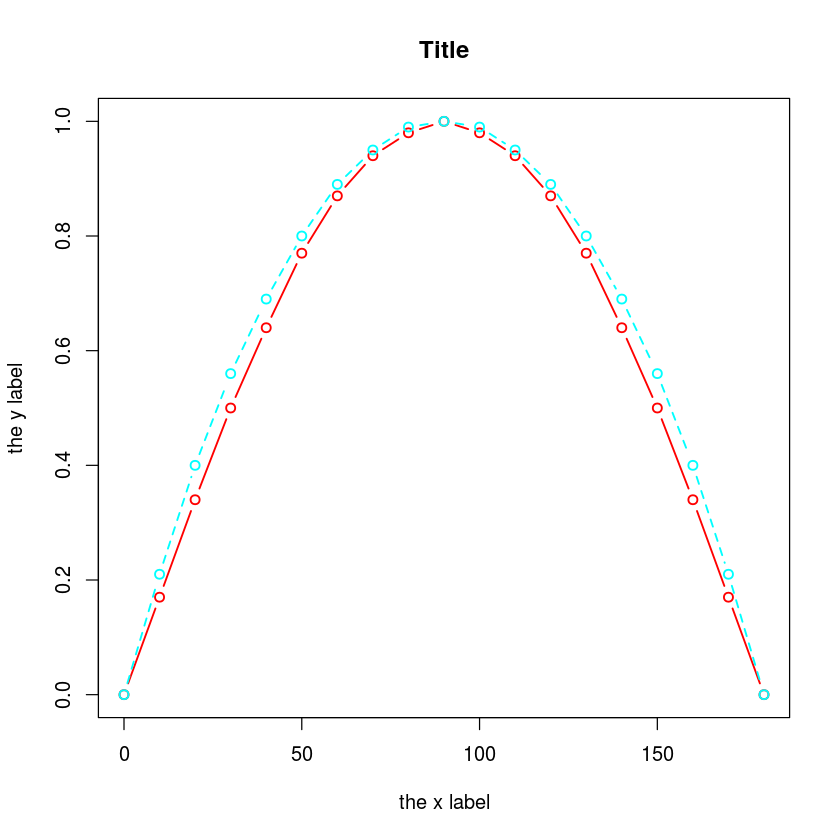

In [2]:
xrange <- range(x)
yrange <- range(y1)
plot(xrange, yrange, type="n", xlab="the x label", ylab="the y label", main="Title")
# type="n" means that no point will be plotted
colors <- rainbow(2) 
linetype <- c(1:2)

lines(x,y1,type="b",lwd=1.5,lty=linetype[1],col=colors[1])
lines(x,y2,type="b",lwd=1.5,lty=linetype[2],col=colors[2])
# type="b" means both lines and points are plotted

### Orange Trees
In this example, we use a dataset that comes with R called [Orange](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/Orange.html) which contains info about 5 different trees, their age, and their circumference of orange trees since 12/31/1928. We want to show the growth of the circumference for all 5 trees in the dataset with respect to their age in days. 
* In order to make this graph clear, we need a [legend()](https://www.rdocumentation.org/packages/graphics/versions/3.5.0/topics/legend). 
* In the legend you see *pch=plotchar* which corresponds to symbols in the legend based on [this chart](https://www.statmethods.net/advgraphs/parameters.html). 
* Also, *cex=.8* scales the points in the legend by .8 from the default size.

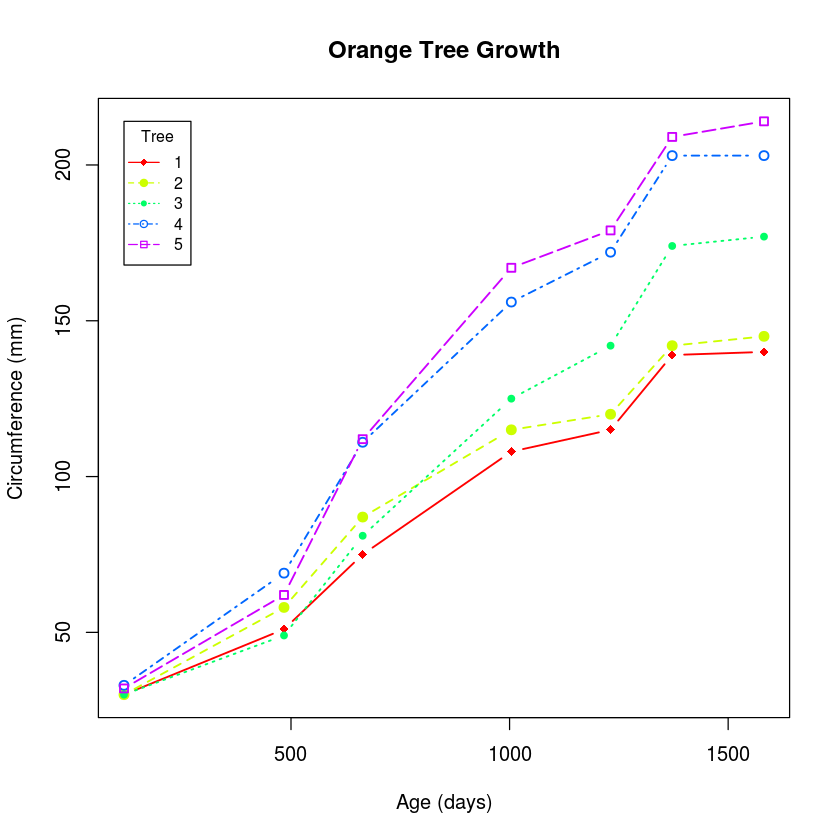

In [3]:
# Let's create a plot with multiple lines.

# Convert Tree names to a numeric factor for convenience. 
Orange$Tree <- as.numeric(Orange$Tree) 
ntrees <- max(Orange$Tree)

# Set the range for x and y axis.
xrange <- range(Orange$age)
yrange <- range(Orange$circumference) 

# set up the plot 
plot(xrange, yrange, type="n", xlab="Age (days)", ylab="Circumference (mm)") 
colors <- rainbow(ntrees) 
linetype <- c(1:ntrees) 
plotchar <- seq(18, 18+ntrees, 1)

# add lines 
for (i in 1:ntrees) 
{ 
  tree <- subset(Orange, Tree==i) 
  lines(tree$age, tree$circumference, type="b", lwd=1.5, lty=linetype[i], col=colors[i], pch=plotchar[i]) 
} 

# Add a title and subtitle. 
title("Orange Tree Growth", "")

# Add a legend. 
legend(xrange[1], yrange[2], 1:ntrees, cex=0.8, col=colors,
       pch=plotchar, lty=linetype, title="Tree")

## 2. Scatterplot

Creating a scatterplot is very similar to a line plot. The only difference is in plot(), we do not specify the type to none (*type="n"*). We just leave it as the default, which plots the points of the data passed into it. 
* We can also add lines of best fit to scatterplots by using [lm()](https://www.rdocumentation.org/packages/stats/versions/3.5.0/topics/lm) a linear regression model. 
* To draw the line on the plot, use [abline()](https://www.rdocumentation.org/packages/graphics/versions/3.5.0/topics/abline), which adds a straight line based on slope intercept.

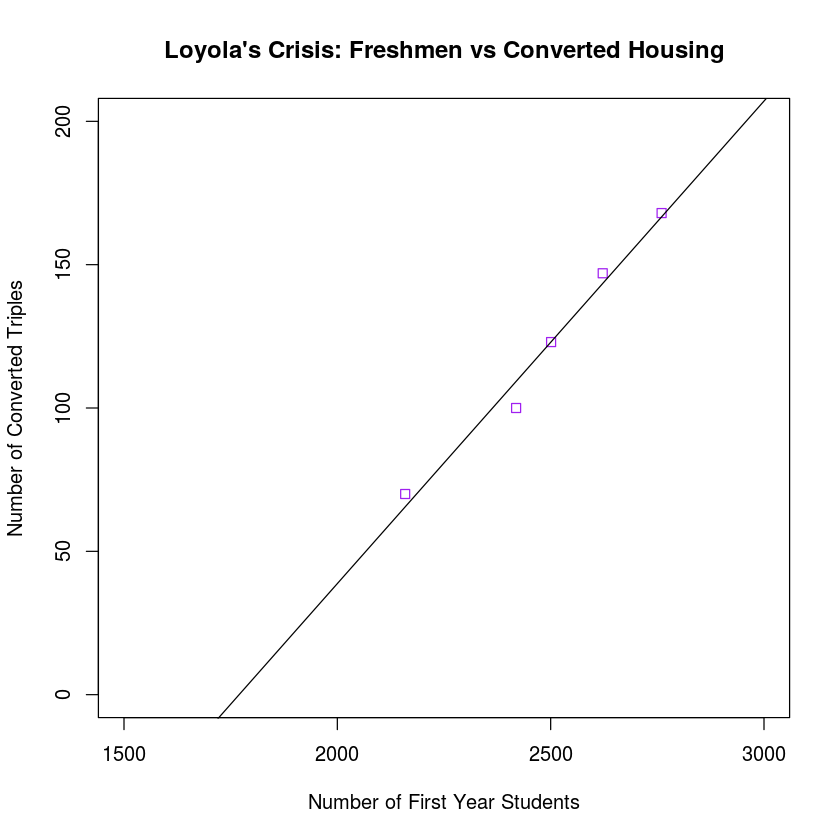

In [4]:
# Let's create a scatterplot.

# Store data points.
x <- c(2159,2419,2501,2622,2760)
y <- c(70,100,123,147,168)

# Plot the graph.
plot(x,y, xlab="Number of First Year Students", ylab="Number of Converted Triples", 
     main="Loyola's Crisis: Freshmen vs Converted Housing", 
     ylim=c(0,200), xlim=c(1500,3000), pch=0, col="purple")

# Get line of best fit.
myline.fit <- lm(y ~ x)

# Draw the line to the plot.
abline(myline.fit)

## 3. Subplot

Subplot allows you to create multiple graphs in one figure. 
* To begine, we use [par()](https://www.statmethods.net/advgraphs/layout.html) and *mfrow* to create a 2x2 matrix (which is how many graphs we'll make)
    * *mfrow* fills in matrix left to right, top to bottom, while *mfcol* fills in matrix top to bottom, left to right.
* Then we use built in data to create 4 graphs inside the figure

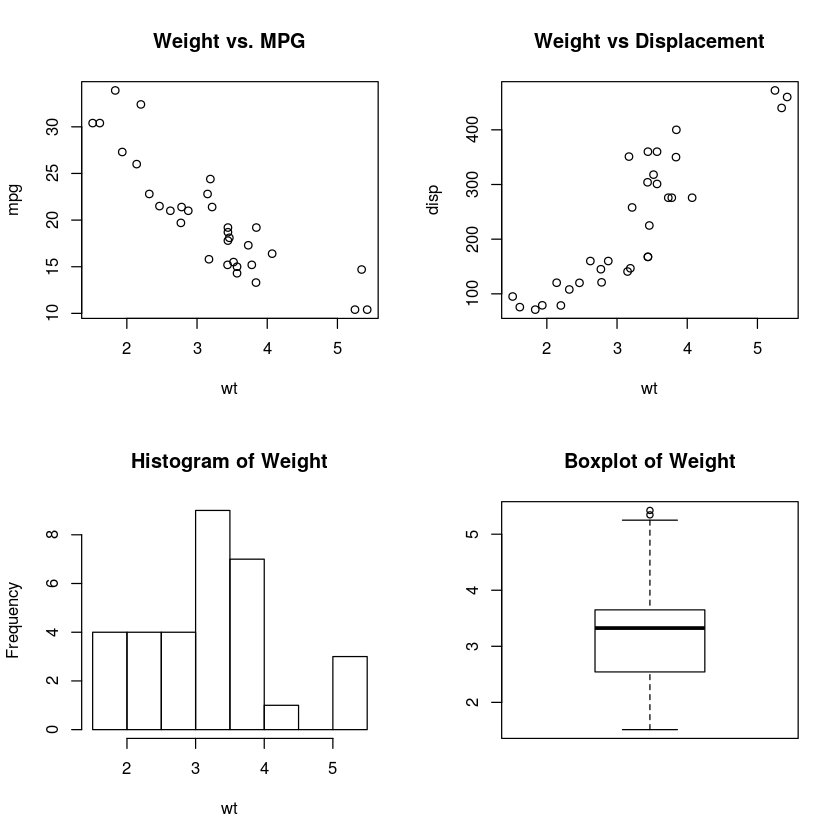

In [5]:
# Let's create a subplot.

# R has a built in data set called Motor Trend Car Road Tests. 
# If you're looking for preset data, this is a great choice. 

# Import data.
attach(mtcars)

# This specifies how many graphs you want to include. 
par(mfrow=c(2,2))

# Plot your graphs.
plot(wt,mpg, main="Weight vs. MPG")
plot(wt,disp, main="Weight vs Displacement")
hist(wt, main="Histogram of Weight")
boxplot(wt, main="Boxplot of Weight")